Q1. Explain the concept of R-squared in linear regression models. How is it calculated, and what does it
represent?

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# Generating a hypothetical dataset
np.random.seed(0)
n_samples = 100
# Independent variables
square_footage = np.random.rand(n_samples) * 1000
num_bedrooms = np.random.randint(1, 6, n_samples)

# Dependent variable
price = 50000 + 100 * square_footage + 10000 * num_bedrooms + np.random.randn(n_samples) * 10000


In [4]:
# Creating a DataFrame
data = pd.DataFrame({
    'SquareFootage': square_footage,
    'NumBedrooms': num_bedrooms,
    'Price': price
})

In [5]:
# Model A: Using square footage as the only predictor
X1 = data[['SquareFootage']]
y = data['Price']
model_a = LinearRegression().fit(X1, y)
y_pred_a = model_a.predict(X1)
r2_a = r2_score(y, y_pred_a)
adjusted_r2_a = 1 - (1 - r2_a) * (n_samples - 1) / (n_samples - X1.shape[1] - 1)


In [6]:
# Model B: Using square footage and number of bedrooms as predictors
X2 = data[['SquareFootage', 'NumBedrooms']]
model_b = LinearRegression().fit(X2, y)
y_pred_b = model_b.predict(X2)
r2_b = r2_score(y, y_pred_b)
adjusted_r2_b = 1 - (1 - r2_b) * (n_samples - 1) / (n_samples - X2.shape[1] - 1)


In [7]:
# Output results
print(f"Model A: R-squared = {r2_a:.4f}, Adjusted R-squared = {adjusted_r2_a:.4f}")
print(f"Model B: R-squared = {r2_b:.4f}, Adjusted R-squared = {adjusted_r2_b:.4f}")


Model A: R-squared = 0.7672, Adjusted R-squared = 0.7648
Model B: R-squared = 0.9355, Adjusted R-squared = 0.9341


To visualize the regression results, we can plot the actual prices versus the predicted prices for both models. Additionally, we can plot the regression lines for Model A and the surface plot for Model B to see how well each model fits the data.



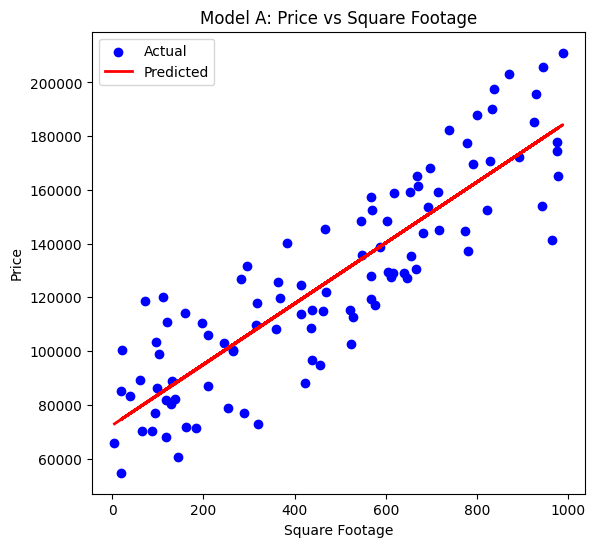

In [10]:
# Plotting results
plt.figure(figsize=(14, 6))
# Plot for Model A
plt.subplot(1, 2, 1)
plt.scatter(X1, y, color='blue', label='Actual')
plt.plot(X1, y_pred_a, color='red', linewidth=2, label='Predicted')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Model A: Price vs Square Footage')
plt.legend()

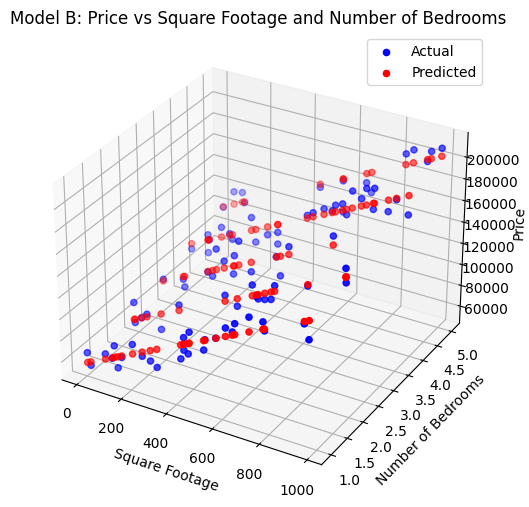

In [11]:
# Plot for Model B
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['SquareFootage'], data['NumBedrooms'], y, color='blue', label='Actual')
ax.scatter(data['SquareFootage'], data['NumBedrooms'], y_pred_b, color='red', label='Predicted')

ax.set_xlabel('Square Footage')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price')
plt.title('Model B: Price vs Square Footage and Number of Bedrooms')
plt.legend()


In [12]:
plt.show()

Residuals analysis is crucial in regression modeling as it helps to diagnose the fit of the model and identify any underlying issues such as non-linearity, outliers, or heteroscedasticity. Here, we'll perform a residuals analysis for both models (Model A and Model B) by plotting the residuals and creating a Q-Q plot to check for normality.



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [14]:
# Residuals for Model A
residuals_a = y - y_pred_a


In [15]:
# Residuals for Model B
residuals_b = y - y_pred_b


Text(0.5, 1.0, 'Residuals Plot for Model A')

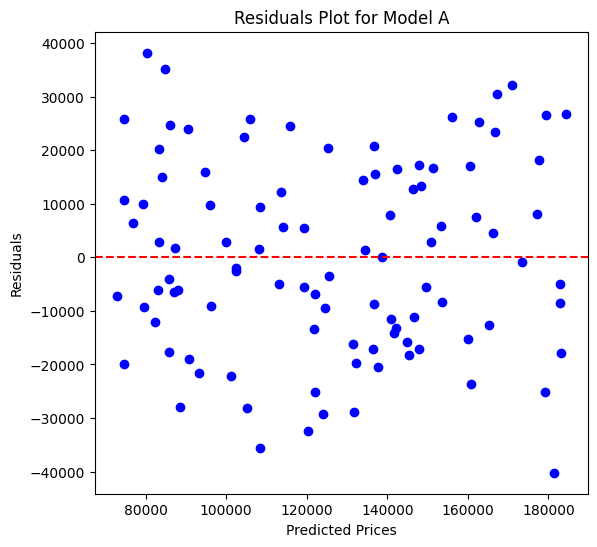

In [16]:
# Plotting residuals
plt.figure(figsize=(14, 6))

# Residuals plot for Model A
plt.subplot(1, 2, 1)
plt.scatter(y_pred_a, residuals_a, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Model A')


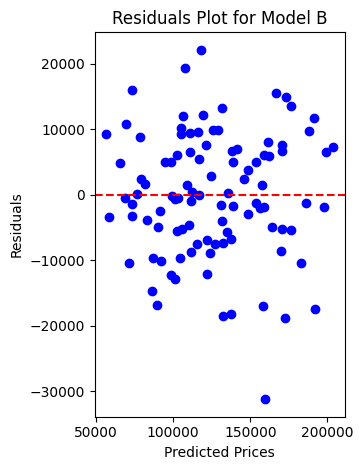

In [17]:
# Residuals plot for Model B
plt.subplot(1, 2, 2)
plt.scatter(y_pred_b, residuals_b, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Model B')

plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Q-Q Plot for Model A Residuals')

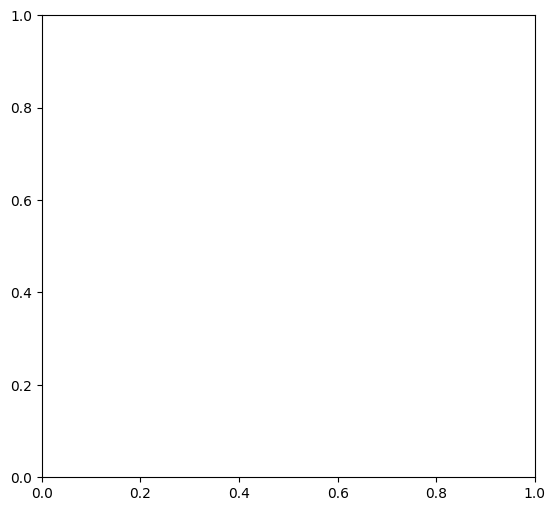

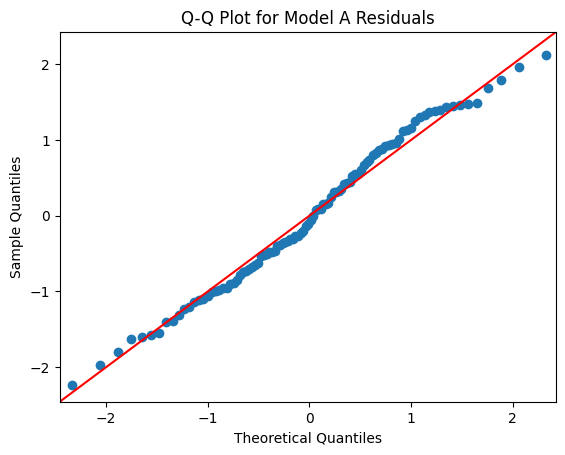

In [18]:
# Q-Q plot for Model A residuals
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sm.qqplot(residuals_a, line='45', fit=True)
plt.title('Q-Q Plot for Model A Residuals')


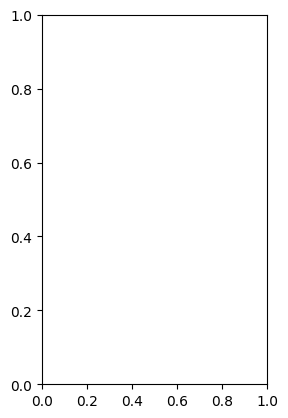

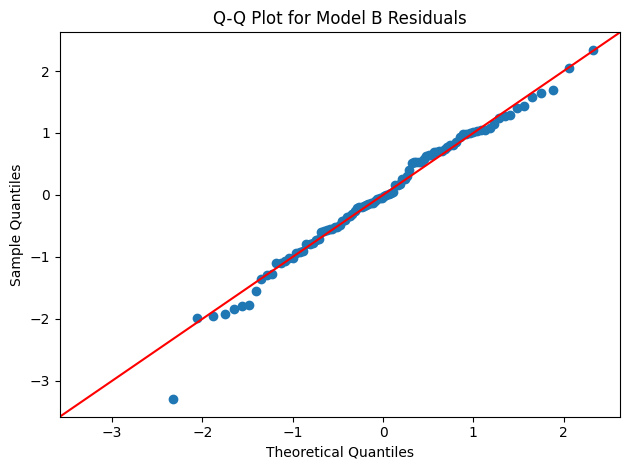

In [19]:
# Q-Q plot for Model B residuals
plt.subplot(1, 2, 2)
sm.qqplot(residuals_b, line='45', fit=True)
plt.title('Q-Q Plot for Model B Residuals')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Histogram of Residuals for Model A')

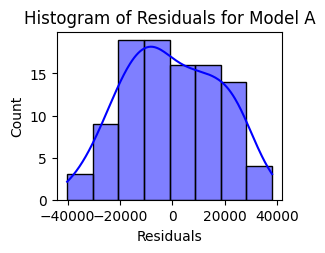

In [20]:
# Histogram of residuals for Model A
plt.subplot(2, 2, 3)
sns.histplot(residuals_a, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals for Model A')

Text(0.5, 1.0, 'Histogram of Residuals for Model B')

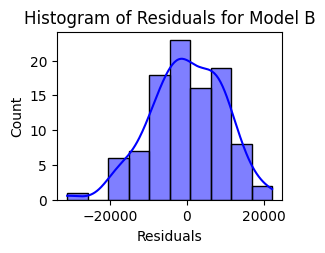

In [21]:
# Histogram of residuals for Model B
plt.subplot(2, 2, 4)
sns.histplot(residuals_b, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals for Model B')

Q2. Define adjusted R-squared and explain how it differs from the regular R-squared.

**Adjusted R-squared** is a modified version of the R-squared (coefficient of determination) that adjusts for the number of predictors in a regression model. While R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables, adjusted R-squared provides a more accurate measure by penalizing the addition of irrelevant predictors.

### Differences between R-squared and Adjusted R-squared

1. **Penalty for Additional Predictors**:
   - **R-squared**: Always increases or stays the same when more predictors are added to the model, even if those predictors do not actually contribute to explaining the variance in the dependent variable.
   - **Adjusted R-squared**: Can increase or decrease with the addition of new predictors. It only increases if the new predictor improves the model more than would be expected by chance.

2. **Formula**:
   - **R-squared**: \[ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} \]
     Where \( SS_{res} \) is the sum of squares of the residuals, and \( SS_{tot} \) is the total sum of squares.
   - **Adjusted R-squared**: \[ \text{Adjusted } R^2 = 1 - \left( \frac{1 - R^2}{n - k - 1} \right) (n - 1) \]
     Where \( n \) is the number of observations and \( k \) is the number of predictors.

3. **Interpretation**:
   - **R-squared**: Indicates how well the predictors explain the variation in the dependent variable, but can be overly optimistic with many predictors.
   - **Adjusted R-squared**: Provides a more reliable measure of goodness-of-fit, especially when comparing models with different numbers of predictors.

### Practical Implications
- **Model Comparison**: When comparing models with different numbers of predictors, adjusted R-squared is a better metric because it accounts for the complexity of the model.
- **Overfitting**: Adjusted R-squared helps in identifying overfitting, as it decreases if the added predictors do not improve the model sufficiently.

In summary, adjusted R-squared offers a more accurate evaluation of a regression model's explanatory power by considering the number of predictors, thus preventing the overestimation of model performance that can occur with regular R-squared.

Here's a Python program that calculates both R-squared and adjusted R-squared for a linear regression model and plots the results to show the difference. For this, we'll use the numpy, pandas, statsmodels, and matplotlib libraries. Make sure you have these libraries installed:



In [23]:
pip install numpy pandas statsmodels matplotlib


R-squared: 0.6000457591765438
Adjusted R-squared: 0.5787715974306153


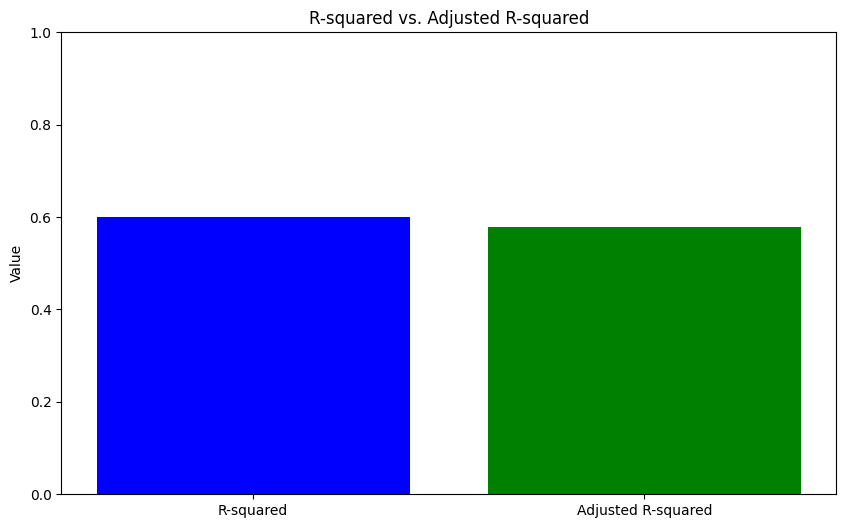

In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate a sample dataset
np.random.seed(0)
X = np.random.rand(100, 5)
y = 3 + np.dot(X, [1.5, -2, 0.5, 3, -1]) + np.random.randn(100)

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(X.shape[1])])
df['y'] = y

# Add a constant term for the intercept
X = sm.add_constant(df.iloc[:, :-1])

# Fit the regression model
model = sm.OLS(df['y'], X).fit()

# Get R-squared and adjusted R-squared
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj

# Print the results
print(f'R-squared: {r_squared}')
print(f'Adjusted R-squared: {adjusted_r_squared}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(['R-squared', 'Adjusted R-squared'], [r_squared, adjusted_r_squared], color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Value')
plt.title('R-squared vs. Adjusted R-squared')
plt.show()


Q3. When is it more appropriate to use adjusted R-squared?

Adjusted R-squared is more appropriate to use when you want to evaluate the goodness of fit of a regression model, particularly when comparing models with different numbers of predictors. Unlike the regular R-squared, which can artificially increase with the addition of more predictors, adjusted R-squared adjusts for the number of predictors in the model. This makes it a better metric when:

1. **Comparing Models with Different Numbers of Predictors:** It accounts for the number of predictors in the model, so it provides a more accurate measure of how well the model generalizes to new data.

2. **Assessing Model Fit with Multiple Predictors:** When you have multiple predictors, adjusted R-squared helps to determine if adding more predictors improves the model fit in a meaningful way or if it's just overfitting.

3. **Avoiding Overfitting:** It penalizes the inclusion of unnecessary predictors, which helps in avoiding overfitting, where the model performs well on the training data but poorly on new data.

In summary, adjusted R-squared is useful when you want a more reliable measure of model fit, especially in scenarios involving multiple predictors.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston Housing dataset
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")


Q4. What are RMSE, MSE, and MAE in the context of regression analysis? How are these metrics
calculated, and what do they represent?

In regression analysis, RMSE (Root Mean Squared Error), MSE (Mean Squared Error), and MAE (Mean Absolute Error) are metrics used to evaluate the performance of a regression model. Each metric provides different insights into the model's prediction accuracy:

1. **Mean Squared Error (MSE):**
   - **Definition:** MSE measures the average squared difference between the actual values and the predicted values.
   - **Formula:**
     \[
     \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
     \]
     where \( y_i \) is the actual value, \( \hat{y}_i \) is the predicted value, and \( n \) is the number of observations.
   - **Interpretation:** MSE penalizes larger errors more heavily due to the squaring of differences. It's useful for highlighting models that produce large errors, but it's sensitive to outliers.

2. **Root Mean Squared Error (RMSE):**
   - **Definition:** RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors.
   - **Formula:**
     \[
     \text{RMSE} = \sqrt{\text{MSE}}
     \]
   - **Interpretation:** RMSE is in the same units as the response variable, making it easier to interpret. It also penalizes larger errors more heavily, similar to MSE.

3. **Mean Absolute Error (MAE):**
   - **Definition:** MAE measures the average absolute difference between the actual values and the predicted values.
   - **Formula:**
     \[
     \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
     \]
   - **Interpretation:** MAE provides a linear score that does not disproportionately penalize large errors. It's less sensitive to outliers compared to MSE and RMSE.

**Summary of Metrics:**
- **MSE** emphasizes larger errors more because of the squaring term.
- **RMSE** gives an error measure in the same units as the dependent variable, making it interpretable.
- **MAE** provides a more straightforward average error but is less sensitive to large errors.

Choosing between these metrics often depends on the specific goals of the analysis and whether handling outliers or large errors is particularly important.

In [26]:
import numpy as np

def calculate_metrics(y_true, y_pred):
    """
    Calculate MSE, RMSE, and MAE between true and predicted values.

    Parameters:
    - y_true: array-like, true values
    - y_pred: array-like, predicted values

    Returns:
    - mse: Mean Squared Error
    - rmse: Root Mean Squared Error
    - mae: Mean Absolute Error
    """
    # Convert inputs to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the errors
    errors = y_true - y_pred

    # Mean Squared Error
    mse = np.mean(errors**2)

    # Root Mean Squared Error
    rmse = np.sqrt(mse)

    # Mean Absolute Error
    mae = np.mean(np.abs(errors))

    return mse, rmse, mae

# Example usage
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mse, rmse, mae = calculate_metrics(y_true, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 0.375
Root Mean Squared Error (RMSE): 0.6123724356957945
Mean Absolute Error (MAE): 0.5


Q5. Discuss the advantages and disadvantages of using RMSE, MSE, and MAE as evaluation metrics in
regression analysis.

In [ ]:
Certainly! Let's delve into the advantages and disadvantages of three commonly used regression evaluation metrics: **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **Root Mean Squared Error (RMSE)**.

1. **Mean Absolute Error (MAE)**:
   - **Advantages**:
     - **Simplicity**: MAE is straightforward to understand and calculate. It represents the average absolute difference between predicted and actual values.
     - **Robustness**: MAE is less sensitive to outliers compared to MSE and RMSE.
     - **Unit Consistency**: The MAE value is in the same units as the target variable (e.g., dollars if predicting prices).
   - **Disadvantages**:
     - **Equal Weighting**: MAE treats all errors equally, regardless of their magnitude. It doesn't differentiate between small and large errors.

2. **Mean Squared Error (MSE)**:
   - **Advantages**:
     - **Mathematical Properties**: MSE is differentiable, making it useful as a loss function for optimization algorithms.
     - **Penalizes Large Errors**: MSE penalizes larger errors more heavily than smaller ones.
   - **Disadvantages**:
     - **Unit Mismatch**: The MSE value is in squared units, which may not directly align with the target variable.
     - **Outlier Sensitivity**: MSE is sensitive to outliers, as it squares the errors.

3. **Root Mean Squared Error (RMSE)**:
   - **Advantages**:
     - **Unit Consistency**: Like MAE, RMSE has the same units as the target variable.
     - **Balanced Penalty**: RMSE balances the penalty for large errors without squaring the values.
   - **Disadvantages**:
     - **Outlier Sensitivity**: RMSE is still sensitive to outliers, although less so than MSE.

In summary, choose the metric based on your specific context:
- Use **MAE** when robustness and simplicity are crucial.
- Use **MSE** when differentiability matters (e.g., gradient-based optimization) and you want to penalize large errors.
- Use **RMSE** when balancing unit consistency and error sensitivity is essential¹²³⁴. 📊

.

Q6. Explain the concept of Lasso regularization. How does it differ from Ridge regularization, and when is
it more appropriate to use?

Lasso (Least Absolute Shrinkage and Selection Operator) regularization and Ridge regularization are both techniques used to prevent overfitting in regression models by adding a penalty to the magnitude of the coefficients.

### Lasso Regularization:
- **Objective:** Lasso regularization adds a penalty equal to the absolute value of the magnitude of coefficients. The objective function in Lasso regularization is:
  \[
  \text{Loss Function} = \text{Residual Sum of Squares} + \lambda \sum_{i=1}^{p} |\beta_i|
  \]
  where \(\lambda\) is the regularization parameter and \(\beta_i\) are the coefficients of the regression model.
- **Effect:** Lasso can shrink some coefficients exactly to zero, effectively performing feature selection. This means it can help in identifying the most important features by excluding less relevant ones.
- **Appropriate When:** Lasso is particularly useful when you suspect that many features are irrelevant or redundant and you want to automatically select a subset of important features.

### Ridge Regularization:
- **Objective:** Ridge regularization adds a penalty equal to the square of the magnitude of coefficients. The objective function in Ridge regularization is:
  \[
  \text{Loss Function} = \text{Residual Sum of Squares} + \lambda \sum_{i=1}^{p} \beta_i^2
  \]
  where \(\lambda\) is the regularization parameter and \(\beta_i\) are the coefficients.
- **Effect:** Ridge regularization shrinks the coefficients towards zero but does not set any of them exactly to zero. This results in all features being included in the model but with reduced influence.
- **Appropriate When:** Ridge is more appropriate when you have many features, and you believe that all of them are relevant, but you want to prevent overfitting by shrinking the coefficients.

### Key Differences:
- **Coefficient Shrinkage:** Lasso can set coefficients to zero, leading to sparse models, while Ridge only shrinks coefficients but keeps all features in the model.
- **Feature Selection:** Lasso performs feature selection, whereas Ridge does not.
- **Model Complexity:** Lasso can produce simpler models by reducing the number of features, while Ridge generally results in more complex models with all features included but with reduced effect.

### Choosing Between Lasso and Ridge:
- **Use Lasso** when you need feature selection and want a simpler, more interpretable model.
- **Use Ridge** when you have many features and want to keep all of them in the model while reducing their influence to handle multicollinearity.

In practice, Elastic Net regularization combines both Lasso and Ridge penalties and can be used when you want to balance between feature selection and coefficient shrinkage.

To demonstrate the differences between Lasso and Ridge regularization, you can use Python with the scikit-learn library. Here’s a sample program that compares both regularizations on a synthetic dataset:



Lasso Mean Squared Error: 0.11
Ridge Mean Squared Error: 0.07


<ipython-input-27-aee04e7d28c3>:38: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lasso.coef_, use_line_collection=True)
<ipython-input-27-aee04e7d28c3>:45: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(ridge.coef_, use_line_collection=True)


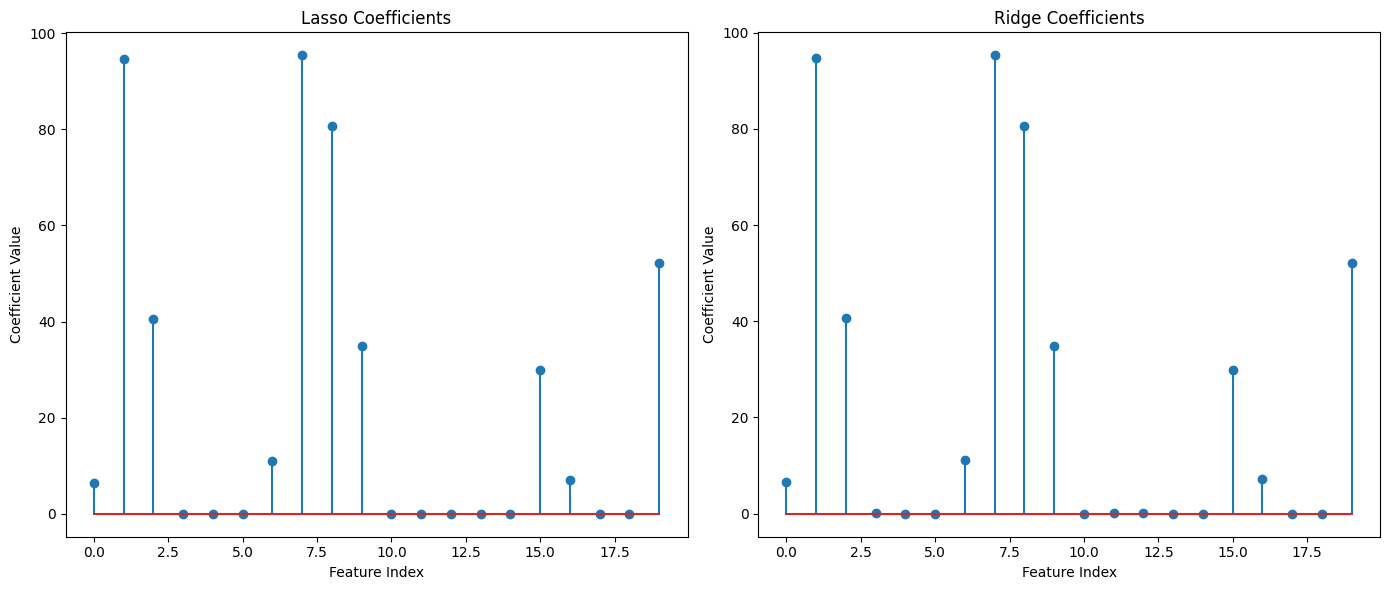

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Create a synthetic dataset
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Lasso and Ridge models
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength for Lasso
ridge = Ridge(alpha=0.1)  # alpha is the regularization strength for Ridge

# Fit the models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Make predictions
lasso_predictions = lasso.predict(X_test)
ridge_predictions = ridge.predict(X_test)

# Calculate Mean Squared Error
lasso_mse = mean_squared_error(y_test, lasso_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

print(f"Lasso Mean Squared Error: {lasso_mse:.2f}")
print(f"Ridge Mean Squared Error: {ridge_mse:.2f}")

# Plot the coefficients
plt.figure(figsize=(14, 6))

# Plot Lasso coefficients
plt.subplot(1, 2, 1)
plt.stem(lasso.coef_, use_line_collection=True)
plt.title('Lasso Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

# Plot Ridge coefficients
plt.subplot(1, 2, 2)
plt.stem(ridge.coef_, use_line_collection=True)
plt.title('Ridge Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()


#Elastic Net details:

Elastic Net is a regularization technique that combines the penalties of Lasso (L1 regularization) and Ridge (L2 regularization). This approach leverages the strengths of both Lasso and Ridge, making it particularly useful when dealing with datasets where there are correlations between features or when feature selection and regularization are both needed.

### Key Concepts:

1. **Elastic Net Penalty:**
   The Elastic Net penalty is a linear combination of the L1 and L2 penalties. The objective function for Elastic Net regularization is:
   \[
   \text{Loss Function} = \text{Residual Sum of Squares} + \lambda_1 \sum_{i=1}^{p} |\beta_i| + \lambda_2 \sum_{i=1}^{p} \beta_i^2
   \]
   where:
   - \(\lambda_1\) is the regularization parameter for the L1 penalty (Lasso).
   - \(\lambda_2\) is the regularization parameter for the L2 penalty (Ridge).
   - \(\beta_i\) are the coefficients of the model.

2. **Mixing Parameter:**
   The Elastic Net combines Lasso and Ridge regularization through a mixing parameter \(\alpha\), which determines the balance between L1 and L2 regularization:
   \[
   \text{Elastic Net Penalty} = \alpha \sum_{i=1}^{p} |\beta_i| + \frac{1 - \alpha}{2} \sum_{i=1}^{p} \beta_i^2
   \]
   - When \(\alpha = 1\), the penalty is equivalent to Lasso.
   - When \(\alpha = 0\), the penalty is equivalent to Ridge.

3. **When to Use Elastic Net:**
   Elastic Net is particularly useful when:
   - There are many features, and you expect that only a subset of them are important.
   - Features are highly correlated. Elastic Net can handle correlated features better than Lasso alone, which might select one feature among the correlated ones while ignoring others.

### Python Example:





Elastic Net Mean Squared Error: 1080.63


<ipython-input-28-aa81dec2839a>:33: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(elastic_net.coef_, use_line_collection=True)


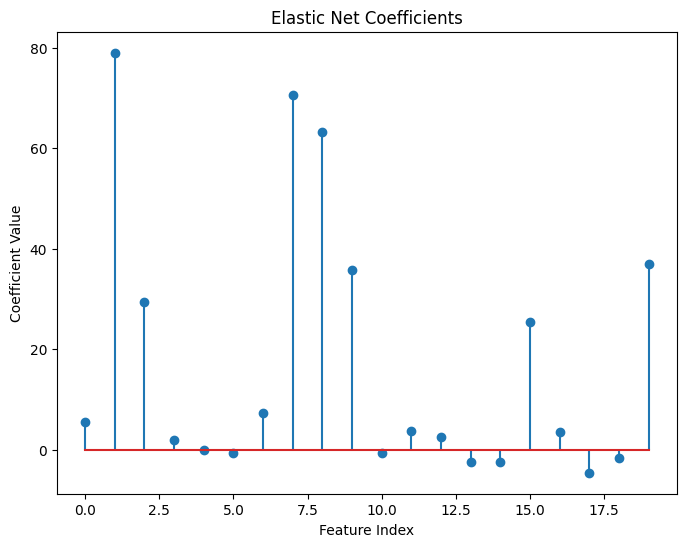

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Elastic Net model
# Set alpha (mixing parameter) and l1_ratio (which is the ratio of l1 to l2 penalty)
alpha = 0.5  # Mixing parameter for Elastic Net (between 0 and 1)
l1_ratio = 0.5  # Ratio between L1 and L2 penalty
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# Fit the model
elastic_net.fit(X_train, y_train)

# Make predictions
predictions = elastic_net.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)

print(f"Elastic Net Mean Squared Error: {mse:.2f}")

# Plot the coefficients
plt.figure(figsize=(8, 6))
plt.stem(elastic_net.coef_, use_line_collection=True)
plt.title('Elastic Net Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.show()


Q7. How do regularized linear models help to prevent overfitting in machine learning? Provide an
example to illustrate.

Regularized linear models help to prevent overfitting by adding a penalty to the complexity of the model, which discourages it from fitting the noise in the training data. The goal is to find a balance between fitting the training data well and keeping the model simple enough to generalize well to unseen data.

### Key Regularization Techniques:

1. **L1 Regularization (Lasso Regression):**
   - **Penalty Term:** \( \lambda \sum_{i} |w_i| \)
   - **Effect:** Encourages sparsity in the model coefficients, effectively setting some of them to zero. This can be useful for feature selection and reducing the model's complexity.

2. **L2 Regularization (Ridge Regression):**
   - **Penalty Term:** \( \lambda \sum_{i} w_i^2 \)
   - **Effect:** Penalizes large coefficients, leading to a more evenly distributed set of coefficients. It tends to shrink the coefficients but doesn't necessarily set any to zero.

3. **Elastic Net Regularization:**
   - **Penalty Term:** \( \lambda_1 \sum_{i} |w_i| + \lambda_2 \sum_{i} w_i^2 \)
   - **Effect:** Combines both L1 and L2 regularization, providing a balance between feature selection and coefficient shrinkage.

### Example:

Consider a linear regression problem where we want to predict the price of houses based on features like size, number of rooms, and location. If we use a standard linear regression model without regularization, it might overfit the training data by creating very large coefficients for certain features, particularly if those features are not very predictive or if there is noise in the data.

**Without Regularization:**
- The model might fit the training data perfectly but perform poorly on the test data because it captures noise and irrelevant details.

**With L2 Regularization:**
- By adding an L2 penalty, we constrain the size of the coefficients. This prevents the model from assigning too much importance to any one feature, leading to better generalization on new data.

For example, suppose the initial model's coefficients for features are:
- Size: 50
- Number of rooms: 30
- Location: -10

With L2 regularization, the regularization term might shrink these coefficients to:
- Size: 40
- Number of rooms: 20
- Location: -5

This reduced complexity can help the model perform better on new, unseen data by focusing on the most important features and ignoring noise.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
# Step 1: Generate synthetic data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)


In [31]:
# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
# Step 3: Train and evaluate models
# Linear Regression without regularization
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)


In [33]:
# Linear Regression with L2 Regularization (Ridge Regression)
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)


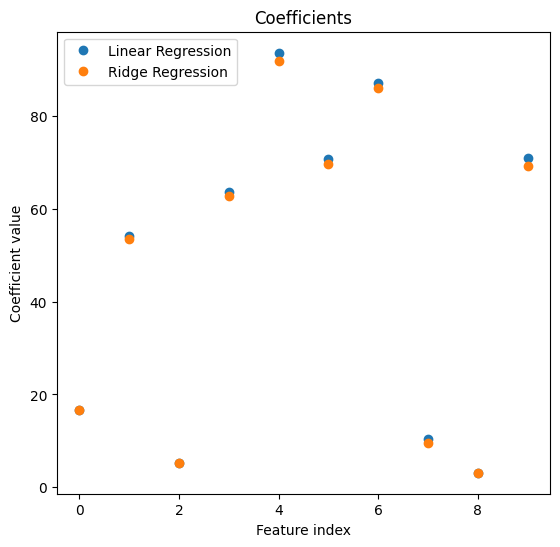

In [34]:
# Step 4: Plot results
plt.figure(figsize=(14, 6))
# Plot coefficients
plt.subplot(1, 2, 1)
plt.plot(lr_model.coef_, 'o', label='Linear Regression')
plt.plot(ridge_model.coef_, 'o', label='Ridge Regression')
plt.title('Coefficients')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.legend()


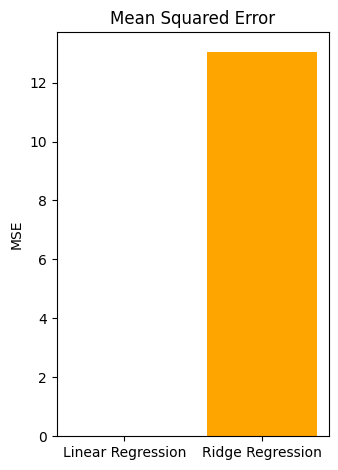

In [35]:
# Plot MSE
plt.subplot(1, 2, 2)
plt.bar(['Linear Regression', 'Ridge Regression'], [mse_lr, mse_ridge], color=['blue', 'orange'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()


In [36]:
# Print the results
print(f"Mean Squared Error (Linear Regression): {mse_lr:.4f}")
print(f"Mean Squared Error (Ridge Regression): {mse_ridge:.4f}")
print(f"Coefficients (Linear Regression): {lr_model.coef_}")
print(f"Coefficients (Ridge Regression): {ridge_model.coef_}")


Mean Squared Error (Linear Regression): 0.0138
Mean Squared Error (Ridge Regression): 13.0529
Coefficients (Linear Regression): [16.76788933 54.13882379  5.18664713 63.65233553 93.6071948  70.63063877
 87.07007903 10.43293371  3.15217068 70.90697249]
Coefficients (Ridge Regression): [16.6582898  53.44783515  5.17613895 62.76903017 91.81095606 69.5432175
 85.97563116  9.56076599  3.17008264 69.26777986]


 Elastic Net combines both L1 (Lasso) and L2 (Ridge) regularization to handle situations where there are correlations between features or when we want to combine feature selection with coefficient shrinkage. Here’s how you can use Elastic Net in Python with a complete example:



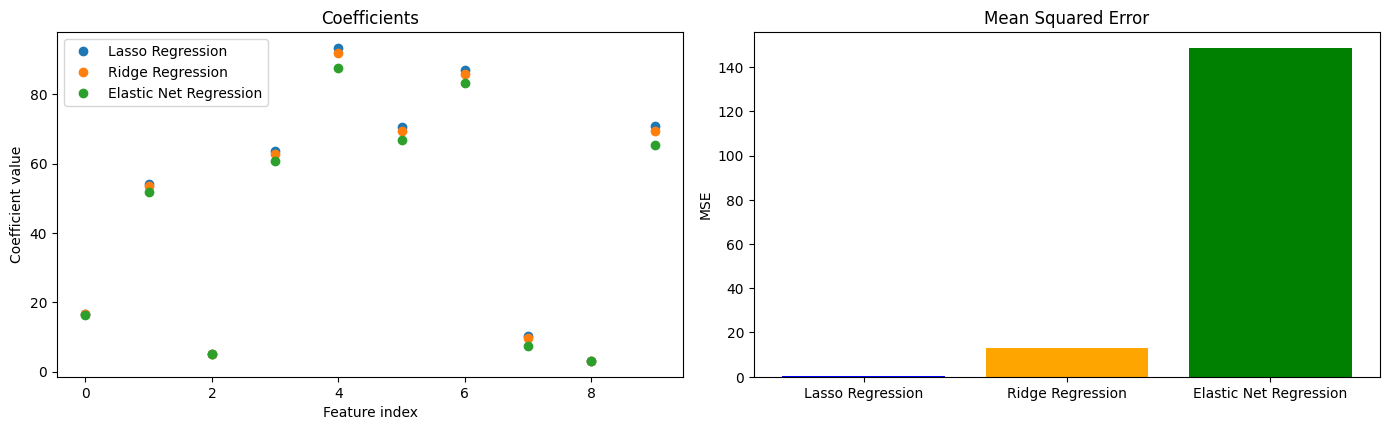

Mean Squared Error (Lasso Regression): 0.2459
Mean Squared Error (Ridge Regression): 13.0529
Mean Squared Error (Elastic Net Regression): 148.3948
Coefficients (Lasso Regression): [16.62645575 54.08963961  5.04478396 63.5791221  93.43085011 70.52348981
 86.95875828 10.22365701  3.05103997 70.74379784]
Coefficients (Ridge Regression): [16.6582898  53.44783515  5.17613895 62.76903017 91.81095606 69.5432175
 85.97563116  9.56076599  3.17008264 69.26777986]
Coefficients (Elastic Net Regression): [16.29797205 51.70434544  5.10073778 60.62389016 87.54708269 66.91242804
 83.34444159  7.52889499  3.16391282 65.44195321]


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Generate synthetic data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train and evaluate models
# Linear Regression with L1 Regularization (Lasso)
lasso_model = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Linear Regression with L2 Regularization (Ridge)
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Linear Regression with Elastic Net Regularization
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Alpha is regularization strength, l1_ratio balances L1 and L2
elastic_net_model.fit(X_train, y_train)
y_pred_elastic_net = elastic_net_model.predict(X_test)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

# Step 4: Plot results
plt.figure(figsize=(14, 8))

# Plot coefficients
plt.subplot(2, 2, 1)
plt.plot(lasso_model.coef_, 'o', label='Lasso Regression')
plt.plot(ridge_model.coef_, 'o', label='Ridge Regression')
plt.plot(elastic_net_model.coef_, 'o', label='Elastic Net Regression')
plt.title('Coefficients')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.legend()

# Plot MSE
plt.subplot(2, 2, 2)
plt.bar(['Lasso Regression', 'Ridge Regression', 'Elastic Net Regression'],
        [mse_lasso, mse_ridge, mse_elastic_net],
        color=['blue', 'orange', 'green'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

# Print the results
print(f"Mean Squared Error (Lasso Regression): {mse_lasso:.4f}")
print(f"Mean Squared Error (Ridge Regression): {mse_ridge:.4f}")
print(f"Mean Squared Error (Elastic Net Regression): {mse_elastic_net:.4f}")
print(f"Coefficients (Lasso Regression): {lasso_model.coef_}")
print(f"Coefficients (Ridge Regression): {ridge_model.coef_}")
print(f"Coefficients (Elastic Net Regression): {elastic_net_model.coef_}")


Q8. Discuss the limitations of regularized linear models and explain why they may not always be the best
choice for regression analysis.

Regularized linear models, such as Lasso (L1 regularization) and Ridge (L2 regularization), are popular tools in regression analysis due to their ability to prevent overfitting and manage multicollinearity. However, they have several limitations:

1. **Linearity Assumption**: Regularized linear models assume a linear relationship between predictors and the response variable. If the true relationship is nonlinear, these models may not capture the underlying patterns effectively.

2. **Feature Selection (Lasso)**: While Lasso can perform feature selection by shrinking some coefficients to zero, this can lead to biased estimates, especially when predictors are highly correlated. In such cases, Lasso might arbitrarily select one predictor over another, which might not always be ideal.

3. **Prediction Performance**: Regularization can sometimes lead to suboptimal predictions. For example, Ridge regression tends to shrink coefficients but rarely eliminates them entirely, which might not always lead to the best model if a sparse model is desired.

4. **Hyperparameter Tuning**: Both Lasso and Ridge require tuning of hyperparameters (e.g., regularization strength). The choice of these hyperparameters can significantly impact model performance and is not always straightforward.

5. **Interpretability**: Regularized models, especially those with strong regularization, can be harder to interpret. The shrinking or elimination of coefficients might obscure the true importance of certain features.

6. **Computational Complexity**: While not usually a major issue, regularization adds additional complexity to the optimization process, which can be computationally intensive for very large datasets or when using complex regularization paths.

7. **Robustness to Outliers**: Regularized linear models can be sensitive to outliers. While they may help in managing multicollinearity, they don't inherently address the influence of outliers, which can distort the model’s performance.

In summary, while regularized linear models offer significant advantages, especially in terms of reducing overfitting and handling multicollinearity, they may not always be the best choice for all regression problems, particularly when dealing with nonlinear relationships, feature interactions, or when interpretability and robustness to outliers are crucial. Alternative methods such as polynomial regression, decision trees, or ensemble methods might be more suitable depending on the specific problem at hand.

Q9. You are comparing the performance of two regression models using different evaluation metrics.
Model A has an RMSE of 10, while Model B has an MAE of 8. Which model would you choose as the better
performer, and why? Are there any limitations to your choice of metric?

To decide which model is better based on RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error), you should consider the following:

1. **Understanding the Metrics:**
   - **RMSE** measures the square root of the average squared differences between predicted and actual values. It penalizes larger errors more heavily than smaller ones, making it sensitive to outliers.
   - **MAE** measures the average absolute differences between predicted and actual values. It treats all errors equally, without giving more weight to larger errors.

2. **Comparison of Models:**
   - Model A has an RMSE of 10.
   - Model B has an MAE of 8.

   Since RMSE tends to be more sensitive to outliers and larger errors, Model A’s RMSE being higher could indicate that it has larger errors or more variability in the errors compared to Model B’s MAE.

3. **Choosing the Better Model:**
   - **If you prefer a model that handles larger errors better and you are concerned about outliers, you might prefer Model B**, since its MAE is lower, indicating it has a smaller average error magnitude.
   - **If you are more concerned with minimizing the impact of larger errors and you want to avoid outliers influencing your model, Model A might be preferable** despite its higher RMSE, as it accounts for larger errors more significantly.

4. **Limitations of Metrics:**
   - **RMSE**: It may not be appropriate if your dataset has outliers, as it can overly penalize large errors.
   - **MAE**: It does not provide information about the magnitude of errors beyond their average size. It may not be sensitive enough to variations in error sizes.

In summary, if minimizing overall prediction error and accounting for larger errors is crucial, you might choose Model A. If minimizing the average size of errors is more important, Model B might be better. The choice also depends on your specific application and whether you need to handle outliers differently.

Q10. You are comparing the performance of two regularized linear models using different types of
regularization. Model A uses Ridge regularization with a regularization parameter of 0.1, while Model B
uses Lasso regularization with a regularization parameter of 0.5. Which model would you choose as the
better performer, and why? Are there any trade-offs or limitations to your choice of regularization
method?

Choosing between Ridge and Lasso regularization involves understanding the characteristics and trade-offs of each method. Here's a breakdown to help you decide which model might perform better in your scenario:

### **Ridge Regularization (Model A)**

- **Regularization Parameter**: 0.1
- **Characteristics**: Ridge regression (L2 regularization) adds a penalty equal to the square of the magnitude of coefficients. It shrinks the coefficients but usually does not set them to zero. This method is useful for handling multicollinearity and can improve the stability of the model.

- **Advantages**:
  - Effective when dealing with multicollinearity (highly correlated features).
  - Helps to avoid overfitting by penalizing large coefficients.
  - All features are retained in the model.

- **Disadvantages**:
  - Does not perform feature selection; all features are kept, which may lead to less interpretability.

### **Lasso Regularization (Model B)**

- **Regularization Parameter**: 0.5
- **Characteristics**: Lasso regression (L1 regularization) adds a penalty equal to the absolute value of the magnitude of coefficients. It can shrink some coefficients to exactly zero, effectively performing feature selection.

- **Advantages**:
  - Performs automatic feature selection by driving some coefficients to zero, which can make the model more interpretable.
  - Can help in reducing overfitting and simplifying the model.

- **Disadvantages**:
  - May lead to higher variance if too many coefficients are driven to zero.
  - Less effective when there are many small/medium-sized coefficients contributing to the prediction.

### **Choosing the Better Model**

1. **Performance Metrics**: Evaluate the performance of both models using relevant metrics such as Mean Squared Error (MSE), R-squared, or others depending on your problem (regression or classification). Cross-validation can be useful to assess how each model generalizes to unseen data.

2. **Feature Importance and Interpretability**: If interpretability is important, and you want a model that performs feature selection, Lasso might be preferable due to its tendency to set some coefficients to zero. Ridge is more suitable when you want to retain all features and handle multicollinearity.

3. **Regularization Parameters**: The effectiveness of the regularization parameter values (0.1 for Ridge and 0.5 for Lasso) should be assessed as they significantly affect the model's performance. Tuning these parameters using cross-validation can provide better insights.

### **Trade-offs**

- **Ridge**: Better for multicollinearity and retaining all features but does not simplify the model.
- **Lasso**: Provides feature selection and may lead to a simpler, more interpretable model but could potentially discard useful features.

In conclusion, the choice between Ridge and Lasso should be guided by the specific needs of your problem, the nature of your dataset, and your goals for model interpretability and performance. Evaluating both models using cross-validation and considering the trade-offs will help you make a more informed decision.